# Importing Libraries 

In [1]:
import numpy as np  # for matrix manipulation 
import pandas as pd # file reading and save in dataframe
import matplotlib.pyplot as plt #plots and graphs 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR

import pickle 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error

# Reading the Data 

In this section we just import the data, and run few discriptive sells, such as number of columns and column statistis

In [3]:
data = pd.read_csv("parkinsons_updrs.data.csv") # import csv file as dataframe
data # show dataframe 

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [4]:
print(data.shape)
print(data.columns)
data.head(5)

#5875 instances and 22 numerical variables 

(5875, 22)
Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
data.describe().T #some statistics 

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


# Exploratory Data Analysis 

We are aiming to visulise the distrbution of target variables, which are between 0-40 for Motor UPDRS, and 0-60 in case Total UPDRS. The age range is between 40-80, and there are no outliers in case of those variables, hence no risk when bringin the data to standardised scale, later during the PCA.

<ipython-input-7-25006e6fefbc>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


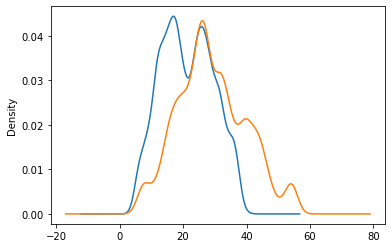

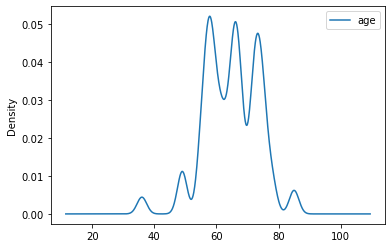

In [7]:
# Show densities of labels to see the distribution 
fig, ax = plt.subplots(1,1)     
data["motor_UPDRS"].plot(kind="density") # show density of the motor_UPDRS
data["total_UPDRS"].plot(kind="density") # show density of total_UPDRS
fig.show()

# show densoty of age column
pd.DataFrame(data.age).plot(kind="density");

https://maxpv.github.io/snippets.html

It is important to see whetehr the independent variables are correlated or not, becaude that an be a result of causality, and can affect the performance of the learning negatively.

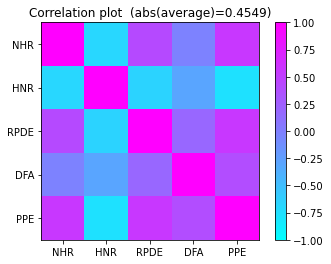

In [8]:
# High negative correlaton between HNR and the other selected variables.
# correlation heatmap 


def corr_sub_plot(ax, df, title=""):
    corr = df.corr()
    avg_corr = np.absolute(corr.values[np.triu_indices_from(corr.values,1)]).mean()
    ax.set_title(title+" (abs(average)={0:.4})".format(avg_corr))
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.columns)))
    ax.set_yticklabels(df.columns)
    ax.set_xticklabels(df.columns)
    return ax.imshow(corr, interpolation="nearest", cmap='cool', vmin=-1, vmax=1)

fig, ax = plt.subplots()
cax = corr_sub_plot(ax, data.iloc[:,17:], title="Correlation plot ")
fig.colorbar(cax);

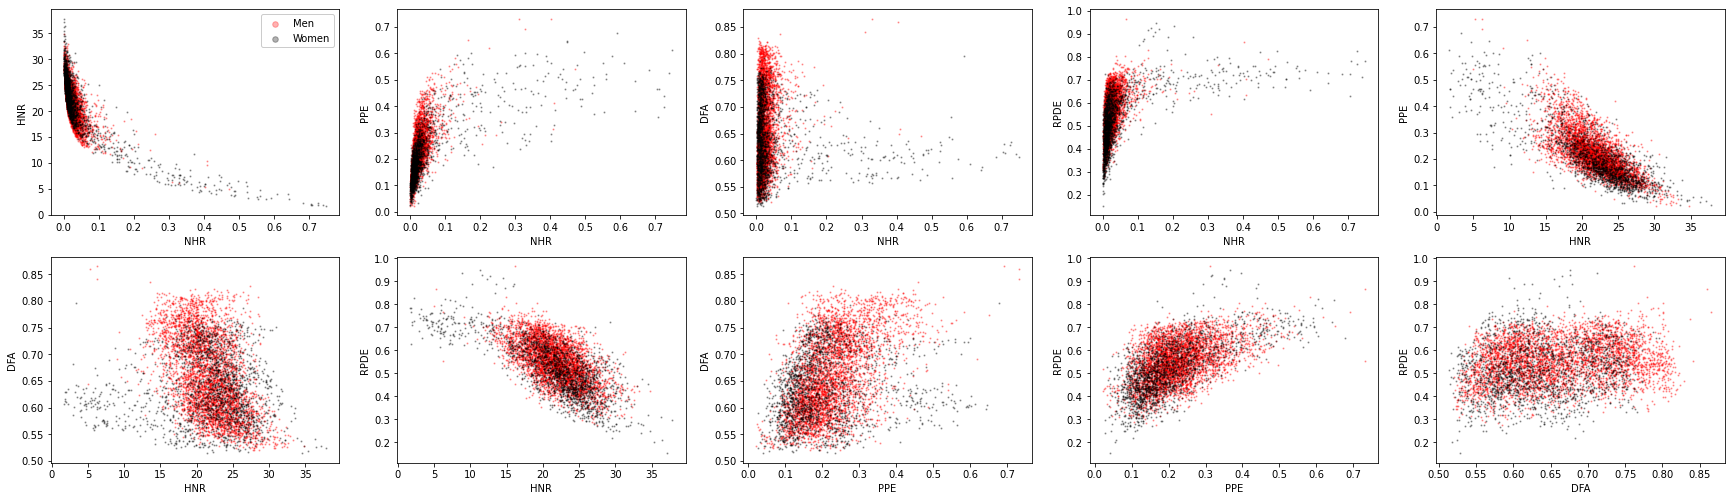

In [9]:
#  usually men and women's voices lies in different fundamental frequencies. 

from itertools import combinations
def scatter_patient(df, subject_list, columns, patient_filter, scatter_alpha=0.3):
    fig, ax = plt.subplots(figsize=(30,22))
    f = [comb for comb in combinations(range(len(columns)), 2)]
    
#https://docs.python.org/3/library/itertools.html
    
    for _, fp, _ in patient_filter:
        fp = fp & subject_list
        
    for i in range(len(f)):
        plt.subplot(5,5,i + 1)
        column_1 = columns[f[i][0]]
        column_2 = columns[f[i][1]]
        
        for name, fp, color in patient_filter:
            plt.scatter(df[fp][column_1], df[fp][column_2], alpha=scatter_alpha, marker='.', color=color, s=5, label=name)
        
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        if(i == 0 or i == len(f)):
            plt.legend(markerscale=5, framealpha=1)


sex_filter_patient = [('Men', data['sex'] == 0, 'red'), 
                      ('Women', data['sex'] == 1, 'black')]
scatter_patient(data, data['subject#'] == data['subject#'], ['NHR', 'HNR', 'PPE', 'DFA', 'RPDE'], sex_filter_patient)

#In the end apparently not much difference. Women, even if represented twice less than men, tends to have more spread values.

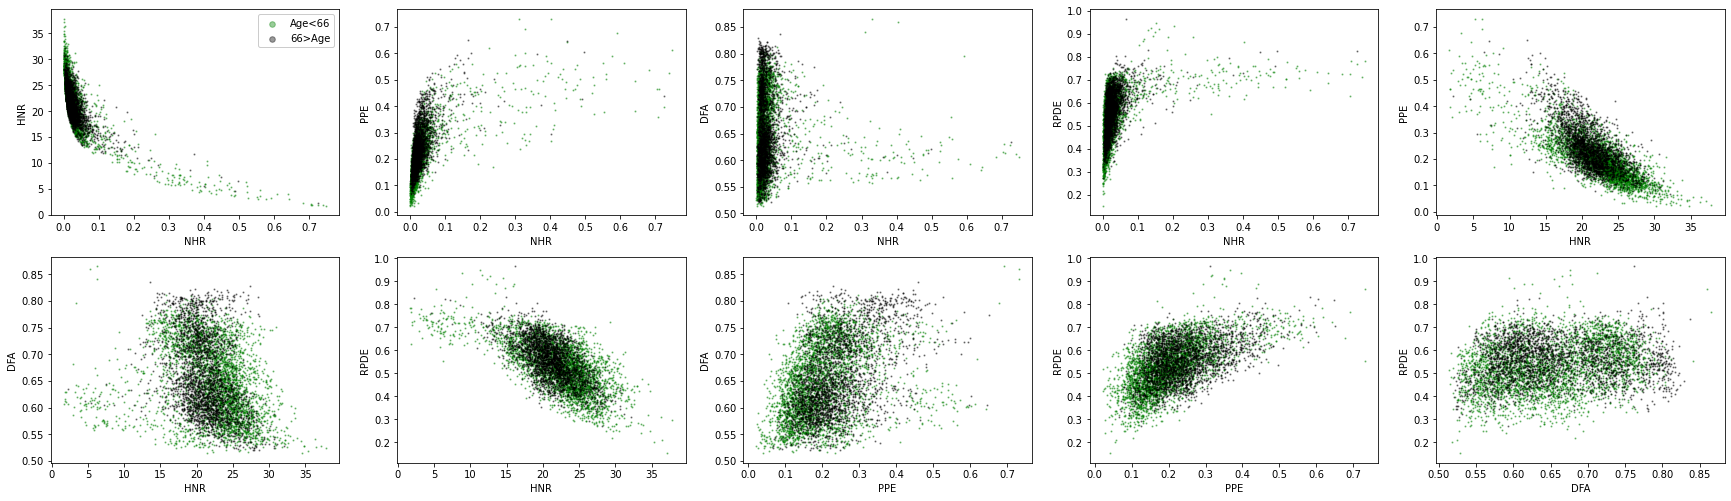

In [10]:
# Filter age patient against different columns, to make sure there is nothing abnormal. I couldn't find much.
low_margin = 66
less = data['age'] <= low_margin
more = data['age'] > low_margin

age_filter_patient = [('Age<{}'.format(low_margin), less, 'green'), 
                      ('{}>Age'.format(low_margin), more, 'black')]
scatter_patient(data, True, ['NHR', 'HNR', 'PPE', 'DFA', 'RPDE'], age_filter_patient, scatter_alpha=0.4)

# Preparing the Data 
Dimensionality Reduction, Splitting Train & Test

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

numerical = ['Jitter(%)', 'Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP',
            'Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA',
            'NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'age', 'sex', 'test_time']

features_pipe = make_pipeline(StandardScaler(), PCA(n_components=0.95)) # makepipline and perform standardisation and PCA
targets_pipe = make_pipeline(StandardScaler()) # only standardisation  

X = features_pipe.fit_transform(data[numerical]) # transform data

targets = data[['motor_UPDRS', 'total_UPDRS']] # labels , 2 outputs considered together
y = targets_pipe.fit_transform(targets) # tranforms and fit labels

input_width = X.shape[1]
print(input_width)

8


In [12]:
# Divide the data into train, validation and test

#standard devision only for MLP

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['subject#'], train_size=0.9, random_state=4422)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4422)

# MLP

In [13]:
# wrap up with Variable in pytorch
train_X = Variable(torch.Tensor(X_train).float())
val_X = Variable(torch.Tensor(X_val).float())
test_X = Variable(torch.Tensor(X_test).float())
train_y = Variable(torch.Tensor(y_train).float())
val_y = Variable(torch.Tensor(y_val).float())
test_y = Variable(torch.Tensor(y_test).float())


## Model Acrhitecture

In [14]:
#learnt during the lab

class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 20) #layer 1
        self.fc2 = nn.Linear(20, 30) #layer 2
        self.fc3 = nn.Linear(30, 10) #layer 3
        self.fc4 = nn.Linear(10, 2) #output Motor UPDRS and Total Updrs 
        

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)  #non binary activation/linear 
        

        return X

## Initialize model

In [15]:

net = Net()

criterion  = torch.nn.MSELoss() #error/cost function

optimizer = torch.optim.SGD(net.parameters(), lr=0.01) #to update the parameters after each batch 

## Train model

https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html  
    

In [16]:

train_loss = []
val_loss = []
epc = []
for epoch in range(10000):
    optimizer.zero_grad() #sets the gradient to 0, it is convenient  to do the parameter updates crrectly 
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward() #backpropogation
    optimizer.step() 
    #train_loss.append(loss)

    #validation
    out_val = net(val_X)
    loss_val = criterion(out_val, val_y)
    
    #val_loss.append(loss_val)
    
    if epoch % 100 == 0: #calculating train and val loss after each 100 iterations 
        train_loss.append(loss.detach().numpy())
        val_loss.append(loss_val.detach().numpy())
        epc.append(epoch)
        print('number of epoch' + '  ' + str(epoch+1) + " "+ 'Training loss'  + " "+ str(loss.detach().numpy()))
        print('number of epoch' + '  ' + str(epoch+1) + " "+'Validation loss'+ " " + str(loss_val.detach().numpy()))

### save
predict_out = net(test_X) #we don't need this 



number of epoch  1 Training loss 1.041394
number of epoch  1 Validation loss 1.0795221
number of epoch  101 Training loss 1.0021734
number of epoch  101 Validation loss 1.029349
number of epoch  201 Training loss 0.99559367
number of epoch  201 Validation loss 1.0196352
number of epoch  301 Training loss 0.99106866
number of epoch  301 Validation loss 1.0141706
number of epoch  401 Training loss 0.98667485
number of epoch  401 Validation loss 1.0094469
number of epoch  501 Training loss 0.9816915
number of epoch  501 Validation loss 1.0042814
number of epoch  601 Training loss 0.974963
number of epoch  601 Validation loss 0.9969766
number of epoch  701 Training loss 0.96431714
number of epoch  701 Validation loss 0.98525983
number of epoch  801 Training loss 0.94842273
number of epoch  801 Validation loss 0.9681377
number of epoch  901 Training loss 0.92548525
number of epoch  901 Validation loss 0.94395113
number of epoch  1001 Training loss 0.89630705
number of epoch  1001 Validation

Plotting MSEs of Training and Validation on a graph to assess statistical fit 

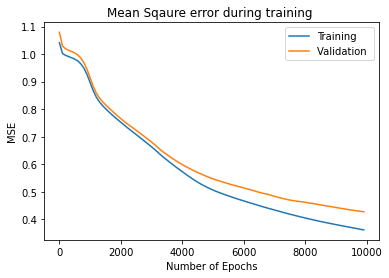

In [17]:

plt.plot(epc,train_loss, label = "Training ")
# plotting the line 2 points 
plt.plot(epc, val_loss, label = "Validation ")
plt.xlabel('Number of Epochs')
# Set the y axis label of the current axis.
plt.ylabel('MSE')
# Set a title of the current axes.
plt.title('Mean Sqaure error during training ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Save model

In [46]:
print("The state dict keys: \n\n", net.state_dict().keys())

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [47]:
checkpoint = {'model': Net(),
              'state_dict': net.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

## Loading model

In [48]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    model.eval()
    
    return model

In [49]:
model = load_checkpoint('checkpoint.pth')
print(model)

Net(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=2, bias=True)
)


## Perform testing and visualising the results 

In [51]:
### save
predict_out = model(test_X)

predict_out

tensor([[-1.1769, -0.9648],
        [-0.2855, -0.2512],
        [-1.1061, -1.0371],
        ...,
        [-1.1100, -1.0991],
        [-1.3847, -1.1785],
        [-0.2049, -0.0404]])

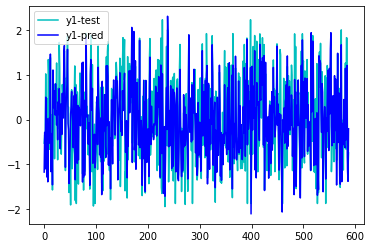

In [52]:
plt.plot(test_y[:,0], label="y1-test", color='c') #all the value sin column 0 
plt.plot(predict_out[:,0], label="y1-pred", color='b')
plt.legend()
plt.show()

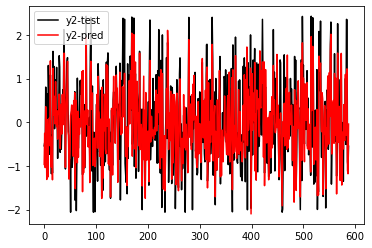

In [53]:
plt.plot(test_y[:,1], label="y2-test", color='k') #all the value sin column 1 
plt.plot(predict_out[:,1], label="y2-pred", color='r')
plt.legend()
plt.show()

## Mean Square Error for MLP

In [54]:
print(mean_squared_error(test_y.detach().numpy(), predict_out.detach().numpy()))

0.33108282


# SVM

Training MSE score:%.4f 0.5232942269543638
Testing MSE score:0.5638
 Plot of prediction vs groud truth  against Cross validation = 1


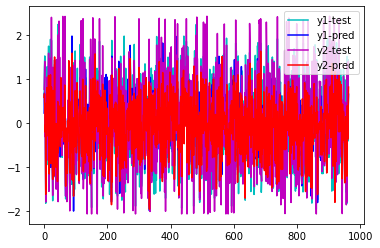

Training MSE score:%.4f 0.5200895510686885
Testing MSE score:0.5684
 Plot of prediction vs groud truth  against Cross validation = 2


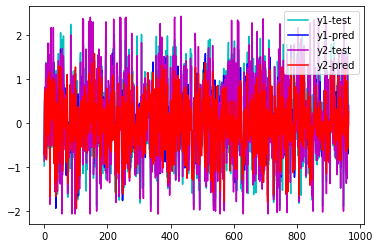

Training MSE score:%.4f 0.5322393306379163
Testing MSE score:0.5362
 Plot of prediction vs groud truth  against Cross validation = 3


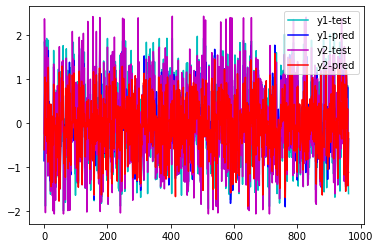

Training MSE score:%.4f 0.5363845648967178
Testing MSE score:0.5337
 Plot of prediction vs groud truth  against Cross validation = 4


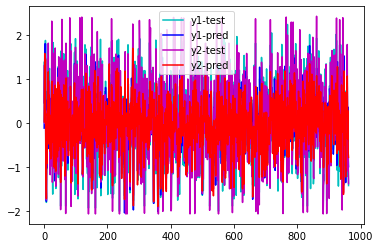

Training MSE score:%.4f 0.5271314414336639
Testing MSE score:0.6063
 Plot of prediction vs groud truth  against Cross validation = 5


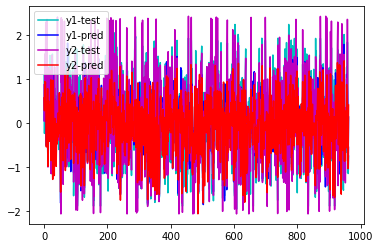

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

inputs  = np.concatenate((X_train, X_test))
target =  np.concatenate((y_train, y_test)) #this section is needed for SVM 

    
kf = KFold(n_splits=5) #number of folds 

tr_MSE = []
val_MSE = []
no_fold=1
for train_index, test_index in kf.split(inputs, target):  #this loops train 5 networks 
    X_train, X_test = inputs[train_index], inputs[test_index] #gives the trainign data for the 1st iteration
    y_train, y_test = target[train_index], target[test_index] #gives the testing data for the 1st iteration

    regressor = SVR(kernel = 'rbf' , C=1) #set up the hyperparameters -radial kernel and boxconstraint 

    # Make it an Multilabel classifier
    multilabel_Regressor = MultiOutputRegressor(regressor, n_jobs=-1)
     
    result=multilabel_Regressor.fit(X_train, y_train)
    
    
    
    #Creating the models 
    pkl_filename = "model_"+str(no_fold)+".pkl" 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(result, file)
    #
    ypred_tr = result.predict(X_train)
    
    #score = result.score(X_train, y_train)
    tr_MSE.append(mean_squared_error(y_train, ypred_tr))
    print("Training MSE score:%.4f", mean_squared_error(y_train, ypred_tr))
    ypred = result.predict(X_test)
    val_MSE.append(mean_squared_error(y_test, ypred))
    print("Testing MSE score:%.4f" % mean_squared_error(y_test, ypred))
    
    x_ax = range(len(X_test))
    print(" Plot of prediction vs groud truth " + " against Cross validation = " + str(no_fold) )
    plt.plot(x_ax, y_test[:,0], label="y1-test", color='c') #all the value sin column 0 
    plt.plot(x_ax, ypred[:,0], label="y1-pred", color='b')
    plt.plot(x_ax, y_test[:,1], label="y2-test", color='m') #all the value sin column 1 
    plt.plot(x_ax, ypred[:,1], label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    no_fold = no_fold + 1
    

In [56]:
ypred_tr = result.predict(X_train)
ypred_tr #the data is standardisedd and normalised (roughly -3 to 3 or -2 to 2)

array([[ 0.49542306,  0.81772924],
       [ 0.67256187,  0.6286267 ],
       [ 0.33238348,  0.34867152],
       ...,
       [ 0.23258095,  0.16556635],
       [-0.87137351, -0.75908722],
       [-0.95533952, -0.69748081]])

In [57]:
y_test #just for a quick view 

array([[ 1.09253534,  0.872393  ],
       [-0.23118753,  0.04271818],
       [ 0.48468082,  1.57065825],
       ...,
       [-0.84962199, -0.89995392],
       [-1.14155456, -1.0282792 ],
       [-0.74579094, -0.54797066]])

# Import the Model Back and Calculate MSE

In [66]:
import pickle

# Load from file
pkl_filename = 'model_5.pkl' #the best one so far
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test MSE" + " " + str(score))

Test MSE 0.4162527658502325


# Appendix: getting the modules

In [70]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

torch==1.7.1
scikit-learn==0.23.2
pandas==1.1.3
numpy==1.19.2
matplotlib==3.3.2
